# Import libraries

In [36]:

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')


# load data

In [59]:
#Not in labor force data
not_labor_force_df = pd.read_csv("~/Downloads/not_in_labor_force.csv")
not_labor_force_df.columns = ['Date','NotInLaborForce'] #change column names
not_labor_force_df['Date'] = pd.to_datetime(not_labor_force_df['Date'])  
not_labor_force_df = not_labor_force_df.sort_values('Date', ascending=True) # sort in ascending date order
print(not_labor_force_df)
print(np.min(not_labor_force_df['Date'] ),np.max(not_labor_force_df['Date'] )) #print min and max
not_labor_force_df.head() #view 5rows

          Date  NotInLaborForce
0   1975-01-01            58627
1   1975-02-01            59214
2   1975-03-01            59052
3   1975-04-01            59044
4   1975-05-01            58820
..         ...              ...
544 2020-05-01           101820
545 2020-06-01           100273
546 2020-07-01           100503
547 2020-08-01            99720
548 2020-09-01           100599

[549 rows x 2 columns]
1975-01-01 00:00:00 2020-09-01 00:00:00


,Date,NotInLaborForce
0,1975-01-01,58627
1,1975-02-01,59214
2,1975-03-01,59052
3,1975-04-01,59044
4,1975-05-01,58820


In [62]:
#Unemployment rate data
unemployed_df = pd.read_csv("~/Downloads/unemployment_rate.csv")
unemployed_df.head()
unemployed_df.columns = ['Date','UnemploymentRate'] #change column names
unemployed_df['Date'] = pd.to_datetime(unemployed_df['Date']) #change data type to datetime
unemployed_df = unemployed_df.sort_values('Date', ascending=True) #sort in ascending order
print(unemployed_df) 
unemployed_df.head() 

          Date  UnemploymentRate
0   1948-01-01               3.4
1   1948-02-01               3.8
2   1948-03-01               4.0
3   1948-04-01               3.9
4   1948-05-01               3.5
..         ...               ...
868 2020-05-01              13.3
869 2020-06-01              11.1
870 2020-07-01              10.2
871 2020-08-01               8.4
872 2020-09-01               7.9

[873 rows x 2 columns]


,Date,UnemploymentRate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


# Join data

In [68]:
#setting cutoff between data
cut_off_date = '1990-01-01'

#creating temporary copies 
tmp_not_labor_force_df = not_labor_force_df.copy()
tmp_not_labor_force_df = tmp_not_labor_force_df[tmp_not_labor_force_df['Date'] >= cut_off_date]


tmp_unemployed_df = unemployed_df.copy()
tmp_unemployed_df = tmp_unemployed_df[tmp_unemployed_df['Date'] >= cut_off_date]


#join into single data frame
to_df = pd.merge(tmp_not_labor_force_df,
                tmp_unemployed_df, on = ['Date'], how ='left') 

#propagate non-null values forward
to_df = to_df.fillna(method='ffill')
to_df.tail()

,Date,NotInLaborForce,UnemploymentRate
364,2020-05-01,101820,13.3
365,2020-06-01,100273,11.1
366,2020-07-01,100503,10.2
367,2020-08-01,99720,8.4
368,2020-09-01,100599,7.9


# Plot the result

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea3a97b790>,
      dtype=object)

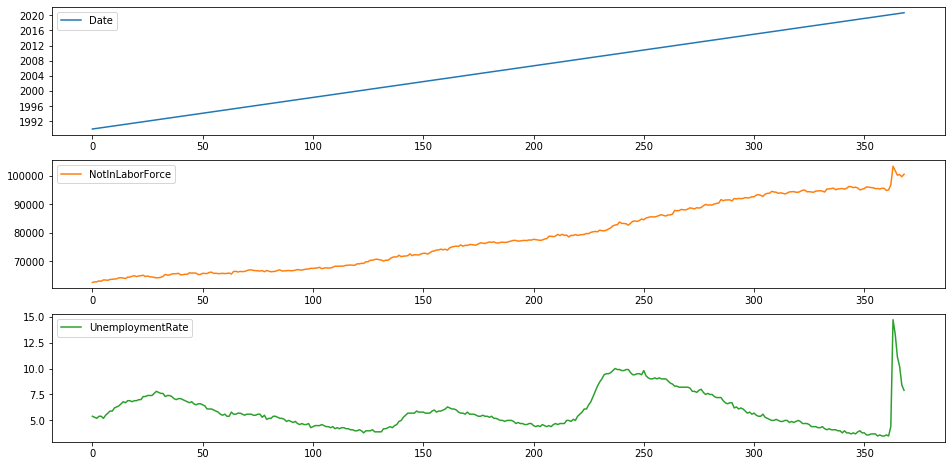

In [69]:
#quick view for figure and axes
fig, ax = plt.subplots(figsize = (16,8)) #size to fit jupyter notebook
to_df.plot(subplots = True, ax = ax)

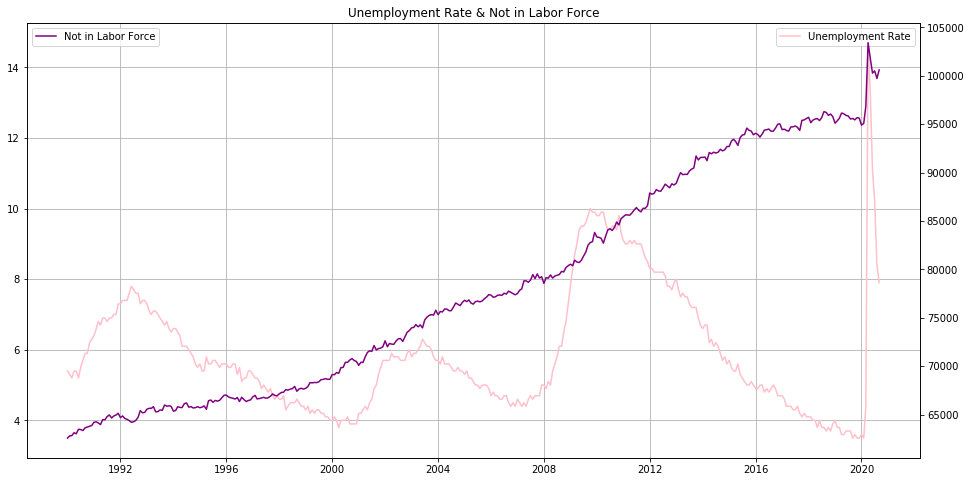

In [85]:
#plot data 
fig, ax = plt.subplots(figsize = (16,8)) #size fit for jupyter notebook

plt.plot(to_df['Date'], 
         to_df['UnemploymentRate'], 
         color='pink', label='Unemployment Rate')
plt.grid()
plt.title("Unemployment Rate & Not in Labor Force")
plt.legend(loc='upper right')

#add another axis 
ax.twinx()
plt.plot(to_df['Date'],
        to_df['NotInLaborForce'],
        color= 'purple', label='Not in Labor Force')
plt.legend(loc='upper left')

plt.show()